In [2]:
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN  
from imblearn.combine import SMOTETomek 
from imblearn.under_sampling import TomekLinks
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load processed data (train/test split)
with open('processed_data.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

# Define a dictionary of sampling methods
sampling_methods = {
    'None': None,  # no sampling
    'SMOTE': SMOTE(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42),
    'TomekLinks': TomekLinks(),
    'ADASYN': ADASYN(random_state=42)
}

# dictionary of models to test
models = {
    'BalancedRF': BalancedRandomForestClassifier(random_state=42),
    'XGB': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LogReg': LogisticRegression(max_iter=1000, class_weight='balanced')
}

# Use StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}  # to store performance metrics

# Loop over each sampling method and each model
for samp_name, sampler in sampling_methods.items():
    for model_name, model in models.items():
        identifier = f"{model_name}_{samp_name}"
        print(f"\n--- Evaluating {identifier} ---")
        
        # Build pipeline: if sampler is provided, include it; otherwise, just the classifier.
        if sampler is not None:
            pipeline = Pipeline([
                ('sampler', sampler),
                ('clf', model)
            ])
        else:
            pipeline = Pipeline([
                ('clf', model)
            ])
        
        # Cross-validation predictions on the training set
        y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=kf, n_jobs=-1)
        print("CV Classification Report:")
        print(classification_report(y_train, y_pred_cv))
        
        # Fit on the full training set and evaluate on the test set
        pipeline.fit(X_train, y_train)
        y_pred_test = pipeline.predict(X_test)
        print("Test Classification Report:")
        print(classification_report(y_test, y_pred_test))
        
        # Calculate and store the macro-average F1-score on the test set
        f1 = f1_score(y_test, y_pred_test, average='macro')
        results[identifier] = f1

# Print a summary of F1-scores for all combinations
print("\nSummary of F1-scores (macro average) on Test Set:")
for identifier, score in results.items():
    print(f"{identifier}: {score:.3f}")



--- Evaluating BalancedRF_None ---
CV Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      7714
           1       0.23      0.96      0.37       264

    accuracy                           0.89      7978
   macro avg       0.61      0.92      0.65      7978
weighted avg       0.97      0.89      0.92      7978



C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1929
           1       0.22      0.97      0.36        66

    accuracy                           0.89      1995
   macro avg       0.61      0.93      0.65      1995
weighted avg       0.97      0.89      0.92      1995


--- Evaluating XGB_None ---
CV Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7714
           1       0.82      0.66      0.73       264

    accuracy                           0.98      7978
   macro avg       0.90      0.83      0.86      7978
weighted avg       0.98      0.98      0.98      7978



C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:38:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1929
           1       0.82      0.80      0.81        66

    accuracy                           0.99      1995
   macro avg       0.90      0.90      0.90      1995
weighted avg       0.99      0.99      0.99      1995


--- Evaluating LogReg_None ---
CV Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      7714
           1       0.14      0.83      0.24       264

    accuracy                           0.82      7978
   macro avg       0.57      0.82      0.57      7978
weighted avg       0.96      0.82      0.88      7978

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1929
           1       0.14      0.85      0.24        66

    accuracy                           0.82      1995
   macro avg  

C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1929
           1       0.62      0.85      0.72        66

    accuracy                           0.98      1995
   macro avg       0.81      0.92      0.85      1995
weighted avg       0.98      0.98      0.98      1995


--- Evaluating XGB_SMOTE ---
CV Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7714
           1       0.62      0.82      0.71       264

    accuracy                           0.98      7978
   macro avg       0.81      0.90      0.85      7978
weighted avg       0.98      0.98      0.98      7978



C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:38:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1929
           1       0.67      0.91      0.77        66

    accuracy                           0.98      1995
   macro avg       0.83      0.95      0.88      1995
weighted avg       0.99      0.98      0.98      1995


--- Evaluating LogReg_SMOTE ---
CV Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7714
           1       0.14      0.81      0.24       264

    accuracy                           0.83      7978
   macro avg       0.57      0.82      0.57      7978
weighted avg       0.96      0.83      0.88      7978

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1929
           1       0.14      0.86      0.24        66

    accuracy                           0.82      1995
   macro avg 

C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1929
           1       0.62      0.83      0.71        66

    accuracy                           0.98      1995
   macro avg       0.81      0.91      0.85      1995
weighted avg       0.98      0.98      0.98      1995


--- Evaluating XGB_SMOTETomek ---
CV Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7714
           1       0.61      0.80      0.69       264

    accuracy                           0.98      7978
   macro avg       0.80      0.89      0.84      7978
weighted avg       0.98      0.98      0.98      7978



C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:39:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1929
           1       0.62      0.89      0.73        66

    accuracy                           0.98      1995
   macro avg       0.81      0.94      0.86      1995
weighted avg       0.98      0.98      0.98      1995


--- Evaluating LogReg_SMOTETomek ---
CV Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7714
           1       0.14      0.81      0.24       264

    accuracy                           0.83      7978
   macro avg       0.57      0.82      0.57      7978
weighted avg       0.96      0.83      0.88      7978

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1929
           1       0.14      0.86      0.24        66

    accuracy                           0.82      1995
   macro

C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1929
           1       0.23      0.97      0.37        66

    accuracy                           0.89      1995
   macro avg       0.61      0.93      0.65      1995
weighted avg       0.97      0.89      0.92      1995


--- Evaluating XGB_TomekLinks ---
CV Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7714
           1       0.78      0.67      0.72       264

    accuracy                           0.98      7978
   macro avg       0.89      0.83      0.86      7978
weighted avg       0.98      0.98      0.98      7978



C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:39:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1929
           1       0.84      0.85      0.84        66

    accuracy                           0.99      1995
   macro avg       0.92      0.92      0.92      1995
weighted avg       0.99      0.99      0.99      1995


--- Evaluating LogReg_TomekLinks ---
CV Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      7714
           1       0.14      0.83      0.23       264

    accuracy                           0.82      7978
   macro avg       0.56      0.82      0.57      7978
weighted avg       0.96      0.82      0.88      7978

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.90      1929
           1       0.14      0.85      0.23        66

    accuracy                           0.82      1995
   macro

C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1929
           1       0.57      0.86      0.69        66

    accuracy                           0.97      1995
   macro avg       0.78      0.92      0.84      1995
weighted avg       0.98      0.97      0.98      1995


--- Evaluating XGB_ADASYN ---
CV Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7714
           1       0.60      0.80      0.68       264

    accuracy                           0.98      7978
   macro avg       0.79      0.89      0.83      7978
weighted avg       0.98      0.98      0.98      7978



C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:39:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1929
           1       0.63      0.91      0.75        66

    accuracy                           0.98      1995
   macro avg       0.81      0.95      0.87      1995
weighted avg       0.98      0.98      0.98      1995


--- Evaluating LogReg_ADASYN ---
CV Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      7714
           1       0.12      0.82      0.21       264

    accuracy                           0.80      7978
   macro avg       0.56      0.81      0.55      7978
weighted avg       0.96      0.80      0.86      7978

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.87      1929
           1       0.12      0.89      0.21        66

    accuracy                           0.78      1995
   macro avg

In [3]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


# Define the pipeline that applies TomekLinks and then trains an XGBoost model
pipeline = Pipeline([
    ('tomek', TomekLinks()),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Define the hyperparameter grid for the XGBoost classifier
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 6, 9],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__reg_lambda': [1, 1.5, 2.0]
}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV to tune the XGBoost model within the pipeline using the F1-score as the scoring metric.
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='f1',  # You can use 'f1_macro' if desired
    n_jobs=-1,
    verbose=2
)

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best CV score
print("Best parameters (with TomekLinks):", grid_search.best_params_)
print("Best cross-validation F1 score:", grid_search.best_score_)

# Evaluate the best estimator on the test set
best_estimator = grid_search.best_estimator_
y_pred_test = best_estimator.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\kealankuar.wh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:59:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters (with TomekLinks): {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 9, 'xgb__n_estimators': 200, 'xgb__reg_lambda': 1.5, 'xgb__subsample': 1.0}
Best cross-validation F1 score: 0.7564593242143036
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1929
           1       0.79      0.83      0.81        66

    accuracy                           0.99      1995
   macro avg       0.89      0.91      0.90      1995
weighted avg       0.99      0.99      0.99      1995



In [4]:
import numpy as np
from sklearn.metrics import classification_report

# Get predicted probabilities for the positive class 
y_prob = best_estimator.predict_proba(X_test)[:, 1]

# Define a range of thresholds to test
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for t in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_thresh = np.where(y_prob >= t, 1, 0)
    print(f"\nClassification Report for Threshold {t}:")
    print(classification_report(y_test, y_pred_thresh))



Classification Report for Threshold 0.3:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1929
           1       0.73      0.86      0.79        66

    accuracy                           0.98      1995
   macro avg       0.86      0.93      0.89      1995
weighted avg       0.99      0.98      0.99      1995


Classification Report for Threshold 0.4:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1929
           1       0.76      0.86      0.81        66

    accuracy                           0.99      1995
   macro avg       0.88      0.93      0.90      1995
weighted avg       0.99      0.99      0.99      1995


Classification Report for Threshold 0.5:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1929
           1       0.79      0.83      0.81        66

    accuracy                           0.99      1995
  

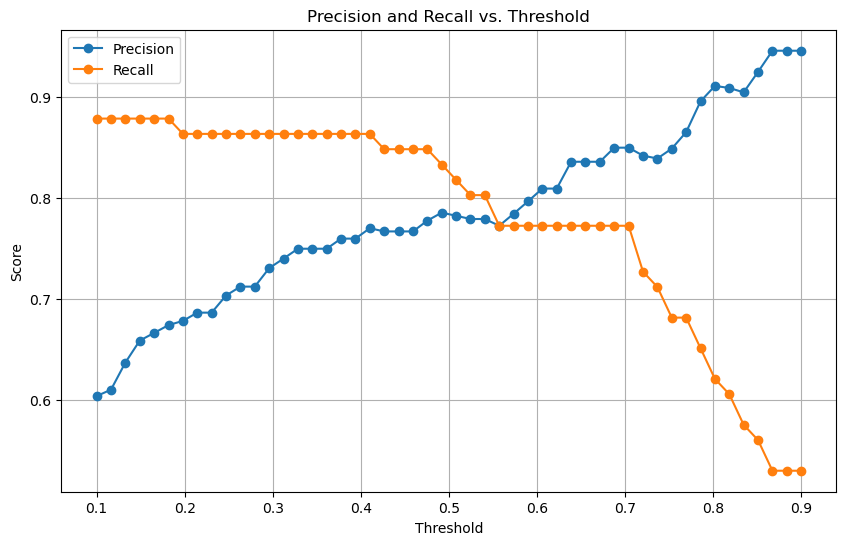

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score



# range of threshold values to test
thresholds = np.linspace(0.1, 0.9, 50)  # 50 values between 0.1 and 0.9
precisions = []
recalls = []

# Compute precision and recall for each threshold
for t in thresholds:
    y_pred_thresh = np.where(y_prob >= t, 1, 0)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))

# Plot precision and recall vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()
